# Introduction to Python data science workflow

## Machine learning at a glance

### What is Machine Learning?

- The field of Machine Learning seeks to answer the question "How can we build systems that **improve with data**, and what are the **fundamental laws that govern learning processes**?"
- **Machine learning** is at the intersection of **computer science** and **statistics**. Goal is to build programs, as in computer science, using data, as in statistics.

- There are related fields/approaches when working with **data**.
- Example: Dataset with house properties and prices
    - **Data science**: Create **database** and **dashboard** for house prices 
    - **Computer science**: Create **search engine** for cheap houses
    - **Statistics**: **Test** impact of neighborhood on house price
    - **Machine learning**: Train a model that **predicts** the price of a new house on the market

The different fields related with data are overlapping, with focus on different aspects. 

e.g. data science focuses on the pipeline of organizing data, dealing with large datasets on the cloud, visualizing relevant information.

Statistics focuses on specific, well defined properties of the data, like hypothesis tests. Model are usually simpler than in ML, with focus on interpretability

Machine learning mixes computer science and statistics, creating complex programs based on data, with the common theme of predicting new values

### Machine learning tasks
- Machine learning tasks have at its center predicting properties for novel data
    - **Predicting** house prices
    - **Classifying** document topics
    - Grouping **similar** users in social networks
    - **Detecting** credit fraud
    - **Generating** novel music

### Machine Learning Pipeline
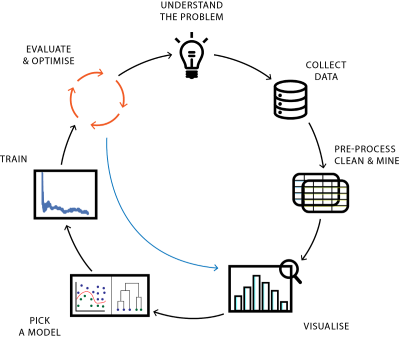

### Two broad categories of learning
#### Supervised Learning
- Data contains **input** $X$ and **outcome** $Y$
- Develop a model that maps inputs to outcomes, $Y = f(X)$
- House data:
    - number of rooms, postcode, m<sup class="footnote">2</sup>  ⇨  house price
- Diabetes:
    - glucose concentration, blood pressure, age  ⇨  has diabetes

#### Unsupervised Learning
- Find structure in the **data** $X$
- **Groups** similar data points (clustering)
    - Grouping similar users in social networks
- Learn to **generate** data, $P(X)$
    - Generate novel text for a topic
- Reduce number of **data** dimensions
    - Find informative dimensions for 2D visualization

https://miro.medium.com/v2/resize:fit:960/1*31iqrQyCqIuuGPLUK_BjMQ.png

https://www.researchgate.net/publication/351953193/figure/fig3/AS:11431281117150742@1675395484096/Supervised-and-unsupervised-machine-learning-a-Schematic-representation-of-an.png

### Complex models

Modern machine learning, in particular **deep learning**, expanded modeling to **very large** #parameters, #data dimensions, #data samples

An important different between models is their complexity. traditional ML models are usual smaller, sometimes linear, with strong assumptions on the data, like gaussian clusters in unsupervised learning. 

Modern model have many parameters, are highly nonlinear and model high dimensional data, especially neural networks.

Nevertheless, the essence of the tasks stays the same, e.g. prediction or clustering, but with the functions f(x) involved being arbitrarily complex, implemented by deep networks.

https://www.mvtec.com/fileadmin/_processed_/f/8/csm_deep-learning-new-methods_dfa516d90f.png

https://miro.medium.com/v2/resize:fit:1400/1*x2_i4oKF-CmdLXCl-zQqEw.png

## Problem of the day - imbalanced data set for classification

Imbalanced data refers to a situation, in machine learning classification problems, where one target class represents a significant proportion of observations. Imbalanced datasets feature a heavy skew in the class distribution, such as 1:100, 1:1000 or 1:10000 examples in the minority class when compared to the majority class.

There are a few main domains in which we can typically observe Class Imbalance:

* Fraud detection (the vast majority of the transactions will be in the "Not-Fraud” class)
* Disease screening (the vast majority will be healthy)
* Subscription churn (the vast majority of customers stay with the service - the “No-Churn” class) 

### Data Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Data Content

This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

This was generated using Sparkov Data Generation | Github tool created by Brandon Harris. This simulation was run for the duration - 1 Jan 2019 to 31 Dec 2020. The files were combined and converted into a standard format.

Is_fraud is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Practical example

We beginn with importing the necessary libraries from open source or python

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

**Information about data**

We always start the DS workflow by investigating the data, if possible visually (when data size is reasonable) if not descriptivly (when working with big data)

In [4]:
raw_df = pd.read_csv('./data/fraudData.csv')

In [148]:
raw_df.shape

(555719, 23)

In [5]:
raw_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


Currently we have 23 columns in our data, however, the basic pandas settings will allows us to investigate them all, to change this behavior we use .set_option() function which allows us to set the 'display.max_columns' variable. By selecting this variable as 'None' we remove all limits. THe .set_option() function works with key value pairs we looked at before

In [7]:
pd.set_option('display.max_columns', None)
raw_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


For a more descriptive view we can use the .info() function that highlights the data type for each column and shows if we have any null (empty) values.

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

### Minimal Feature engineering

Feature engineering can be simply defined as the preprocessing steps that transform raw data into features that can be used in machine learning algorithms. This can be done in a manual or automated way, in case of automation, specific software packages can be used to automatically generate features from input data. The main goal of feature engineering is to increase ML model accuracy - with better data quality comes better predictive results.

We can broadly define 4 types of feature engineering:
* **Feature Creation** - we create new variables by combining variables found in the input data, for example averaging transaction amount accross various credit card purchases;
* **Transformations** - we transform variables in input data by, for example, scaling (having all variables on the same scale) or encoding (transforming categorical values to numeric);
* **Feature Extraction** - we create new variables by manipulating the exsisting variable, for example, creating day of week variable from dates;
* **Feature Selection** - using statistical algorigthms we select only those features that contribute to the predictive power of the model, in this way reducing complexity.

https://www.tecton.ai/wp-content/uploads/2022/07/data-to-feature.png

In [31]:
df = raw_df.copy()

# remove duplicates
df.drop_duplicates(inplace=True)

# Convert date values to their corresponding data types and create the age variable
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"], infer_datetime_format=True)
df['age'] = datetime.date.today().year - pd.to_datetime(df['dob']).dt.year

# Convert credit card numbers to a category value, they are identifiers which we do not want to have in our models
df.cc_num = df.cc_num.astype('category')

# Apply function utcfromtimestamp and drop column unix_time
df['time'] = df['unix_time'].apply(datetime.datetime.utcfromtimestamp)
df.drop('unix_time', axis=1)

# Add cloumns hour of day, day of week and month
df['hour_of_day'] = df.time.dt.hour
df['day_of_week'] = df.time.dt.dayofweek
df['month'] = df.time.dt.month

/var/folders/jf/txw49v6d2jvftt0251wr7xgc0000gn/T/ipykernel_70344/4042309071.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"], infer_datetime_format=True)
/var/folders/jf/txw49v6d2jvftt0251wr7xgc0000gn/T/ipykernel_70344/4042309071.py:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["dob"] = pd.to_datetime(df["dob"], infer_datetime_format=True)


Example of hour_of_day and day_of_week variables that we created:

In [10]:
df[['time','hour_of_day']]

,time,hour_of_day
0,2013-06-21 12:14:25,12
1,2013-06-21 12:14:33,12
2,2013-06-21 12:14:53,12
3,2013-06-21 12:15:15,12
4,2013-06-21 12:15:17,12
...,...,...
555714,2013-12-31 23:59:07,23
555715,2013-12-31 23:59:09,23
555716,2013-12-31 23:59:15,23
555717,2013-12-31 23:59:24,23


In [131]:
df[['time','day_of_week']]

,time,day_of_week
0,2013-06-21 12:14:25,4
1,2013-06-21 12:14:33,4
2,2013-06-21 12:14:53,4
3,2013-06-21 12:15:15,4
4,2013-06-21 12:15:17,4
...,...,...
555714,2013-12-31 23:59:07,1
555715,2013-12-31 23:59:09,1
555716,2013-12-31 23:59:15,1
555717,2013-12-31 23:59:24,1


### Exploratory data analysis example

In order to better understand the relationship between our target variable Y and its predictor variables X we use Exploratory Data Analysis (EDA). It allows us to look for the impact our variables have on the Fraud distribution:
* Is fraud more common with larger transactions?
* Is there a gender pattern in fraud?
* Are there cyclical trends in fraud
* Are there specific product groups that are more likely to be targeted by fraudsters?

Before applying any modeling techniques it is good to have a look at EDA to estimate the potential importance of various features we have created

**amount vs fraud**

/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

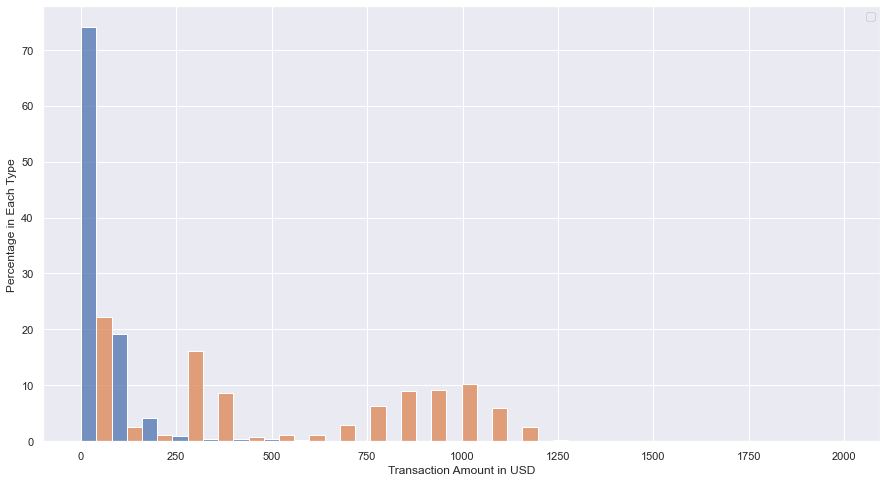

In [135]:
#We set the figure size for easier readability
sns.set(rc = {'figure.figsize':(15,8)})

# We define a histogram for our data with the total amount less or equal to 2000, to remove the outlier features from EDA
ax = sns.histplot(x = 'amt', data = df[df.amt<=2000], hue = 'is_fraud', 
                  stat = 'percent', multiple = 'dodge', common_norm = False, 
                  bins = 25)

# We provide each axis (y and x) with a lable and the final plot with title 
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

**gender vs fraud**

/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

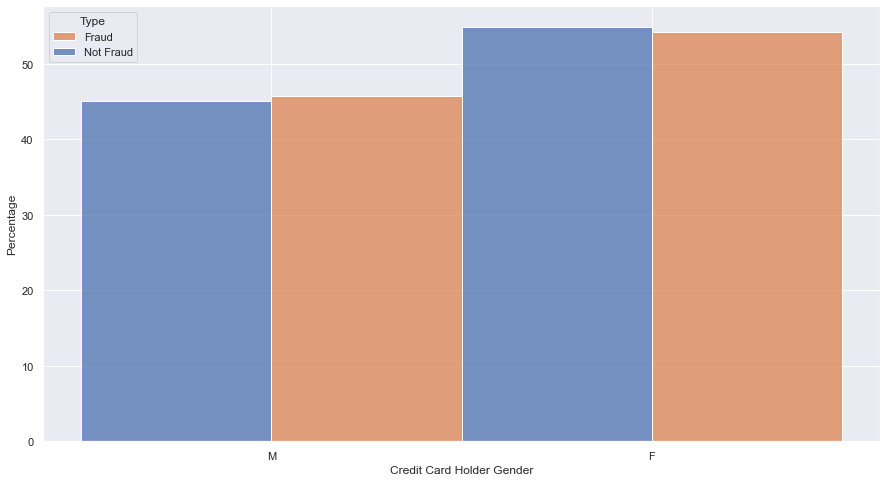

In [133]:
# We do not need to set the figure size sinc this is kept for the duration of the notebook session

# We again define a histogram for our data this time we are looking at gender as our variable
ax = sns.histplot(x = 'gender', data = df, hue = 'is_fraud', 
                  stat = 'percent', multiple = 'dodge', 
                  common_norm = False)

# We provide each axis (y and x) with a lable and the final plot with title 
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title = 'Type', labels = ['Fraud', 'Not Fraud'])

**transaction category vs fraud**

To calculate this variable we need to first create a percentage value for each of our target variable classes (fraud = 1 and non_fraud = 0). We do this by creating a temporary data frames (a and b) for each class.

/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

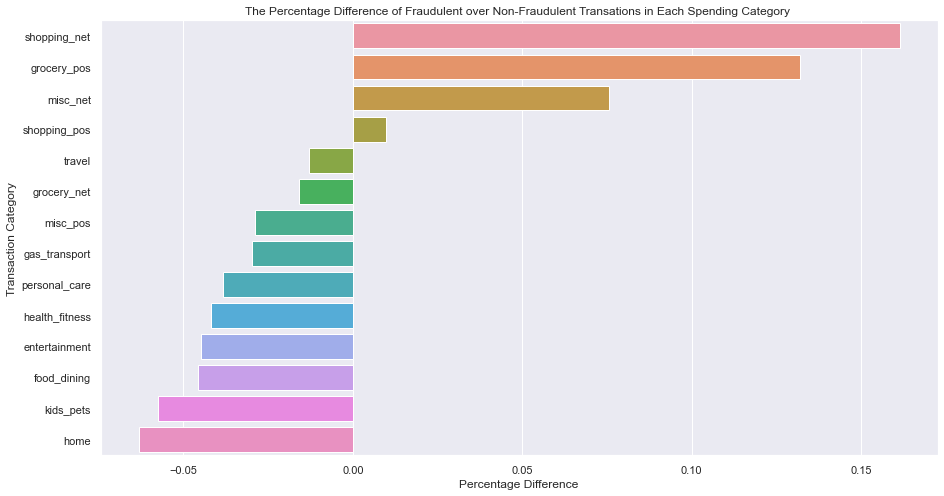

In [147]:
# We create a dataframe with only non_fraud cases and calculate what percwentage of transactions are in each transaction category; 
# In the end we keep only two values category and fraud percentage
a = df[df['is_fraud'] == 0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns = ['category','not fraud percentage']

# We create a dataframe with only fraud cases and calculate what percwentage of rransactions are in each transaction category; 
# In the end we keep only two values category and fraud percentage
b = df[df['is_fraud'] == 1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns = ['category','fraud percentage']

# We combine the two dataframes into one and calculate the difference between both percentages 
ab = a.merge(b, on = 'category')
ab['diff'] = ab['fraud percentage'] - ab['not fraud percentage']

# We create our plot from the newly created data frame by using barplot function
ax = sns.barplot(y = 'category', x = 'diff', data = ab.sort_values('diff', ascending = False))

# We provide each axis (y and x) with a lable and the final plot with title 
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

**hour of day vs fraud**

/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

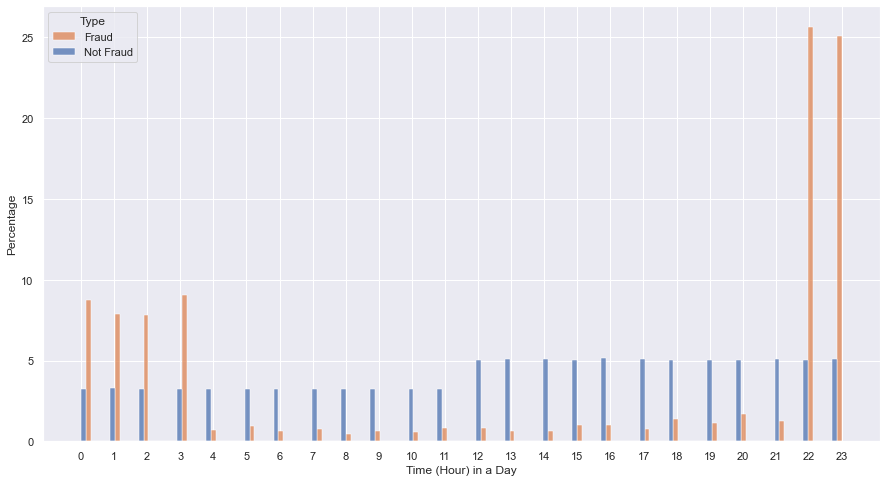

In [141]:
# Histogram for hour of day variable
ax = sns.histplot(data = df, x = "hour_of_day", hue = "is_fraud", 
                  common_norm = False, stat = 'percent', 
                  multiple = 'dodge')


ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')

# We provide the order for our hour variable from 0 to 24
plt.xticks(np.arange(0,24,1))

# plot tilte
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

**day of week vs fraud**

/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

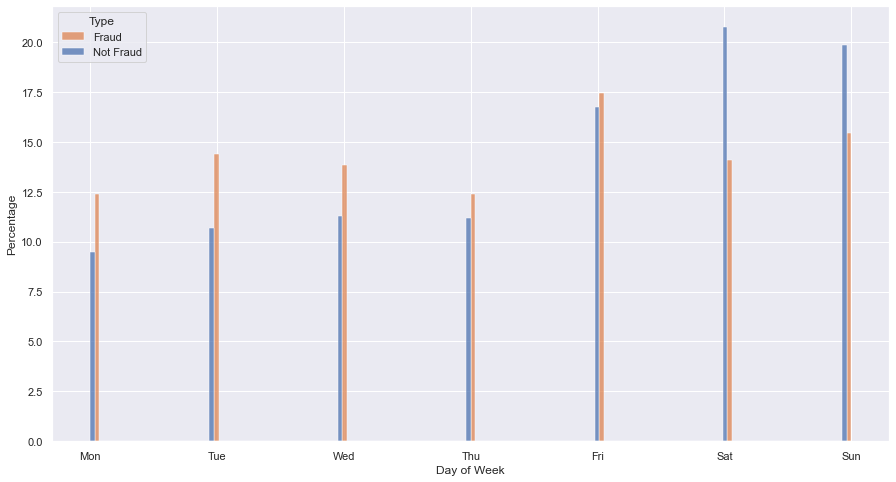

In [146]:
# Histogram for day of the week variable
ax = sns.histplot(data = df, x = "day_of_week", hue = "is_fraud", 
                  common_norm = False, stat = 'percent', 
                  multiple = 'dodge')



# We set our x axis lables to correspond to the day of the week
plt.xticks(np.arange(0, 7, 1))
ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

# Plot lables
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

### Encoding for categoric variables

One of the main feature transformations that we need to do is encoding our categorical variables in a way that ML models can understand them. Most (not all) ML models are not capable of understanding categorical values such as transaction categories that we have in our data set. In odred to be able to use these in our model we need to transform them toa boolean representation.

In [32]:
# First we subset the training data to include only the variables that we need
df_fin = df[['is_fraud', 'category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour_of_day','day_of_week','month']]

#We then use the pandas inbuilt function .get_dummies() to convert category variables to dummy variables (encoded as true or false)
df_fin = pd.get_dummies(df_fin)

df_fin.head()

,is_fraud,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour_of_day,day_of_week,month,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,2.86,29209,33.9659,-80.9355,333497,33.986391,-81.200714,55,12,4,6,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,0,29.84,84002,40.3207,-110.4360,302,39.450498,-109.960431,33,12,4,6,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,0,41.28,11710,40.6729,-73.5365,34496,40.495810,-74.196111,53,12,4,6,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,0,60.05,32780,28.5697,-80.8191,54767,28.812398,-80.883061,36,12,4,6,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,0,3.19,49632,44.2529,-85.0170,1126,44.959148,-85.884734,68,12,4,6,False,False,False,False,False,False,False,False,False,False,False,False,False,True


### Class imbalance in target variable

There are several approaches to solving class imbalance problem before starting classification, such as:

* If possible, more samples from the minority class should be acquired from the knowledge domain (gathering more data).

* Changing the loss function to give the failing minority class a higher cost (statistical technique).

* Oversampling the minority class.

* Undersampling the majority class.

* Looking at synthethic sampling techniques (SMOTE)

* Any combination of previous approaches.

Oversampling methods duplicate or create new synthetic examples in the minority class, whereas undersampling methods delete or merge examples in the majority class. Oversampling is the most often used approach (but not necessarily the best).

([<matplotlib.patches.Wedge at 0x12c6e4ac0>,
 [Text(-1.0999191268840707, 0.013338452480854692, 'Not-Fraud'),
  Text(1.0999191263279473, -0.013338498339964859, 'Fraud')],
 [Text(-0.5999558873913112, 0.007275519535011649, '99.6%'),
  Text(0.5999558870879712, -0.00727554454907174, '0.4%')])

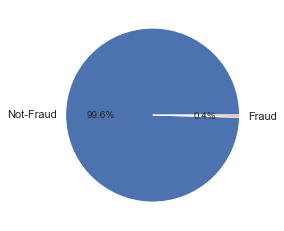

In [33]:
labels=["Not-Fraud","Fraud"]
fraud_or_not = df_fin["is_fraud"].value_counts().tolist()

plt.pie(fraud_or_not, labels = labels, autopct = '%.1f%%')

/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


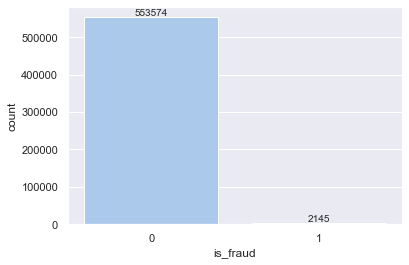

In [18]:
ax = sns.countplot(x='is_fraud',data=df_fin,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [19]:
print('Not_fraud:', round(raw_df['is_fraud'].value_counts()[0]/len(raw_df) * 100,2), '% of the dataset')
print('Fraud:', round(raw_df['is_fraud'].value_counts()[1]/len(raw_df) * 100,2), '% of the dataset')

Not_fraud: 99.61 % of the dataset
Fraud: 0.39 % of the dataset


Classification accuracy is a metric that summarizes the performance of a classification model as the number of correct predictions divided by the total number of predictions.

Accuracy = Correct Predictions / Total Predictions

Achieving 90 percent classification accuracy, or even 99 percent classification accuracy, may be trivial on an imbalanced classification problem. Consider the case of an imbalanced dataset with a 1:100 class imbalance. Simply guessing in favour of the majority class all the time will give us a 99% accuracy score since we will be wrong only once.

The rule of thumb is: accuracy never helps in imbalanced dataset.

* we have **99,6%** (553574) of non-fraud transactions and only **0,4%** (2145) of fraud transactions;

* whis means that a blind guess (bet on non-fraud) would give us accuracy of **99,6%**.


While 99,6% accurate prediction can be considered a good accuracy for most problems, fraud detection (and some other problems) is especially dificult, since a model prioritising Majority class will incure a large business cost by ignoring the fraudulant transactions. What would be the business cost if all companies simply ignored fraud?

The most common metrics to use for imbalanced datasets are:

* F1 score
* Precision
* Recall
* AUC score (AUC ROC)

It is good practice to track multiple metrics when developing a machine learning model as each highlights different aspects of model performance. 

!!NB Insert here comments about test specificity and false positive and false negative rates

**Data split into train and test**

In [34]:
from sklearn.model_selection import train_test_split

x = df_fin.drop('is_fraud', axis=1)
y = df_fin['is_fraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size = 0.2, random_state = 42)

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

**Logistic regression and RandomForest classifiers**

In [52]:
rf = RandomForestClassifier(n_estimators = 50, random_state = 13)
lr = LogisticRegression(solver='saga', random_state = 13)

**Crossvalidation**

In [53]:
kf = StratifiedKFold(n_splits=2, shuffle=False)

score_lr = cross_val_score(lr, x_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores for LogRegression are: {}".format(score_lr))
print("Average Cross Validation Recall score for LogRegression: {}".format(score_lr.mean()))


score_rf = cross_val_score(rf, x_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores for RandomForest are: {}".format(score_rf))
print("Average Cross Validation Recall score for RandomForest: {}".format(score_rf.mean()))

/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Cross Validation Recall scores for LogRegression are: [0. 0.]
Average Cross Validation Recall score for LogRegression: 0.0
Cross Validation Recall scores for RandomForest are: [0.63519814 0.57459207]
Average Cross Validation Recall score for RandomForest: 0.6048951048951049


**Grid search for parameter tunning**

In [99]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [25, 50, 75],
    'max_depth': [2, 4, 6],
    'random_state': [13]
}

grid_rf = GridSearchCV(rf, param_grid=params, cv=kf, 
                          scoring='recall').fit(x_train, y_train)

In [87]:
params_lr = {
    'C': [1, 10, 50],
    'penalty': ["l1", "l2"],
    'random_state': [13]
}

grid_lr = GridSearchCV(lr, param_grid=params_lr, cv=kf, 
                          scoring='recall').fit(x_train, y_train)

/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

**Confustion Matrix**

In [69]:
y_pred = grid_rf.predict(x_test)

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm

array([[110711,      4],
       [   324,    105]])

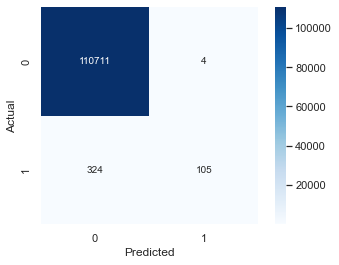

In [117]:
ax = sns.heatmap(cm, annot=True, square=True, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [89]:
y_pred_lr = grid_lr.predict(x_test)

cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[110715,      0],
       [   429,      0]])

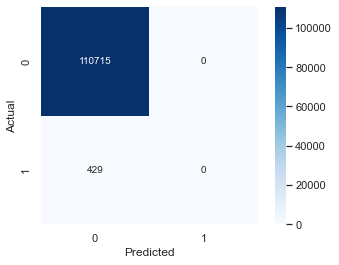

In [116]:
ax = sns.heatmap(cm_lr, annot=True, square=True, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [63]:
rf_Recall = recall_score(y_test, y_pred)
rf_Precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)

ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.244755,0.963303,0.390335,0.997049


**Oversampling**

Resampling involves creating a new transformed version of the training dataset in which the selected examples have a different class distribution.

There are two main approaches to random resampling for imbalanced classification; they are oversampling and undersampling.

* Random Oversampling: Randomly duplicate examples in the minority class.
* Random Undersampling: Randomly delete examples in the majority class.

They are referred to as “naive resampling” methods because they assume nothing about the data and no heuristics are used. This makes them simple to implement and fast to execute, which is **desirable for very large and complex datasets**.

#### Important
Change to the class distribution should be only applied to the **training dataset**. The intent is to influence the fit of the models. The resampling is not applied to the test or holdout dataset used to evaluate the performance of a model.

The random oversampling may increase the likelihood of occurring overfitting, since it makes exact copies of the minority class examples. Let's say every data point from the minority class is copied 6 times before making the splits. If we did a 3-fold validation, each fold has (on average) 2 copies of each point! In this way a classifier might construct rules that are apparently accurate, but actually cover one replicated example.

In [92]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=42)

In [93]:
# fit and apply the transform
x_over, y_over = ros.fit_resample(x_train, y_train)

In [94]:
print('Not-fraud:', y_over.value_counts()[0], '/', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% of the dataset')
print('Frauds:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')

Not-fraud: 442859 / 50.0 % of the dataset
Frauds: 442859 / 50.0 % of the dataset


In [95]:
from imblearn.pipeline import Pipeline, make_pipeline

random_overs_pipeline_rf = make_pipeline(RandomOverSampler(random_state=42),
                                         RandomForestClassifier(n_estimators=50, random_state=13))

In [96]:
score_os_rf = cross_val_score(random_overs_pipeline_rf, x_train, y_train, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score_os_rf))
print("Average Cross Validation Recall score: {}".format(score_os_rf.mean()))

Cross Validation Recall Scores are: [0.68648019 0.65734266]
Average Cross Validation Recall score: 0.671911421911422


In [101]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_os_rf = GridSearchCV(random_overs_pipeline_rf, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid_os_rf.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(n_estimators=50,
                                                               random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [2, 4, 6],
                         'randomforestclassifier__n_estimators': [25, 50, 75],
                         'randomforestclassifier__random_state': [13]},
             return_train_score=True, scoring='recall')

In [103]:
y_pred_os = grid_os_rf.best_estimator_.named_steps['randomforestclassifier'].predict(x_test)
cm_os = confusion_matrix(y_test, y_pred_os)
cm_os

array([[107619,   3096],
       [    45,    384]])

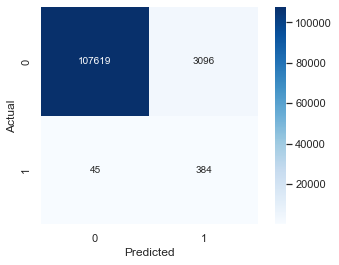

In [115]:
ax = sns.heatmap(cm_os, annot=True, square=True, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

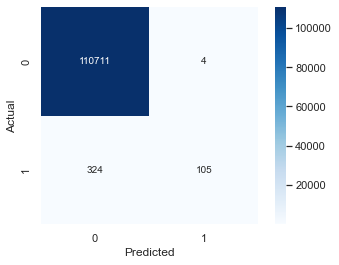

In [118]:
ax = sns.heatmap(cm, annot=True, square=True, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [105]:
over_rf_Recall = recall_score(y_test, y_pred_os)
over_rf_Precision = precision_score(y_test, y_pred_os)
over_rf_f1 = f1_score(y_test, y_pred_os)
over_rf_accuracy = accuracy_score(y_test, y_pred_os)

In [106]:
ndf = [(over_rf_Recall, over_rf_Precision, over_rf_f1, over_rf_accuracy)]

over_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
over_rf_score.insert(0, 'Random Forest with', 'Random Oversampling')
over_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Random Oversampling,0.895105,0.110345,0.19647,0.971739


Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset. This approach may be more suitable for those datasets where there is a class imbalance although a sufficient number of examples in the minority class, such a useful model can be fit.

/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davisozols/.pyenv/versions/3.9.13/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


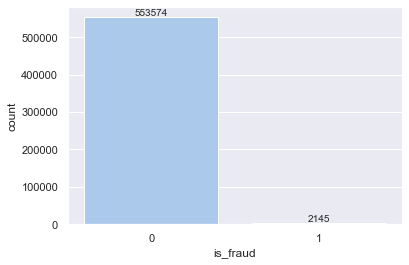

In [119]:
ax = sns.countplot(x='is_fraud',data=df_fin,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

Our data only has 2145 instances of the minority class this would result in massively reducing our data set to accmodate the undersampling. In this instance it would be advised to avoid this technique (regardless this can always be tested to provide empirical evidence)

SMOTE (Synthetic Minority Oversampling Technique) synthesize elements for the minority class. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. 

In general SMOTE is a better approach than Oversampling but introduces extra layers of "black-boxing" - it is harder to explain when interpretable ML is needed. This is also beyond the scope of this exrecise. 

**class weights**

Most of the machine learning models provide a parameter called class_weights. For example, in a random forest classifier using, class_weights we can specify a higher weight for the minority class using a dictionary.

Without weights set, the model treats each point as equally important. Weights scale the loss function. As the model trains on each point, the error will be multiplied by the weight of the point. The estimator will try to minimize error on the more heavily weighted classes, because they will have a greater effect on error, sending a stronger signal.

In [120]:
# If you choose class_weight = "balanced", 
# the classes will be weighted inversely proportional to how frequently they appear in the data.

rfb = RandomForestClassifier(n_estimators=100, random_state=13, class_weight="balanced")

In [121]:
score_b = cross_val_score(rfb, x_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score_b))
print("Average Cross Validation Recall score: {}".format(score_b.mean()))

Cross Validation Recall scores are: [0.61538462 0.57109557]
Average Cross Validation Recall score: 0.5932400932400932


In [122]:
grid_rfb = GridSearchCV(rfb, param_grid=params, cv=kf, 
                          scoring='recall').fit(x_train, y_train)

In [127]:
y_pred_b = grid_rfb.predict(x_test)

cm_b = confusion_matrix(y_test, y_pred_b)

grid_rfb_Recall = recall_score(y_test, y_pred_b)
grid_rfb_Precision = precision_score(y_test, y_pred_b)
grid_rfb_f1 = f1_score(y_test, y_pred_b)
grid_rfb_accuracy = accuracy_score(y_test, y_pred_b)

cm_b

array([[108164,   2551],
       [    59,    370]])

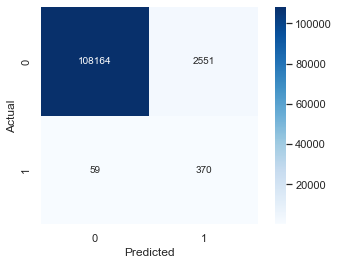

In [128]:
ax = sns.heatmap(cm_b, annot=True, square=True, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [129]:
ndf = [(grid_rfb_Recall, grid_rfb_Precision, grid_rfb_f1, grid_rfb_accuracy)]

grid_rfb_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
grid_rfb_score.insert(0, 'Random Forest with', 'Class weights')
grid_rfb_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Class weights,0.862471,0.126669,0.220896,0.976517


In [130]:
predictions = pd.concat([rf_score, over_rf_score, grid_rfb_score], ignore_index=True, sort=False)

predictions.sort_values(by=['Recall'], ascending=False)

,Random Forest with,Recall,Precision,F1 Score,Accuracy
1,Random Oversampling,0.895105,0.110345,0.196470,0.971739
2,Class weights,0.862471,0.126669,0.220896,0.976517
0,No Under/Oversampling,0.244755,0.963303,0.390335,0.997049


**Performance comparison**

We can achieve the best results in terms of recall with Random Oversampling, Class Weights being a close second. It is important to note that this costs us a lot in terms of Precission (we identify more false positives). This is finally visible in the total Accuracy metrics, with addressing the class imbalance we loose about 2% points of accuracy. 

In the end the final model selection is a business or domain specific decision - 3% cost in overall accuracy might be justified to identify 90% of all fraud instances.

Final note there are other ways to optimise classification models
* we can use different selection metrics (outside of recall):
  * AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.
* we can select different thresholds (probability score at which we classify an observation as 1 or 0), for our current models we classify probability > 0.5 as 1 and everything else as 0. Adjusting this value can be beneficial in increasing our accuracy in predicting the minority class.